# BFGS 

In [2]:
import numpy as np
import numpy.linalg as ln
import scipy as sp
import scipy.optimize

In [48]:

# Objective function
def f(x):
    return x[0]**2 - x[0]*x[1] + x[1]**2 + 9*x[0] - 6*x[1] + 20
# Derivative
def f1(x):
    return np.array([2 * x[0] - x[1] + 9, -x[0] + 2*x[1] - 6])
def bfgs_method(f, fprime, x0, epsi=1e-3):
    """
    Minimize a function func using the BFGS algorithm.
    func : f(x)
        Function to minimise.
    x0 : Initial guess.
    fprime : fprime(x)
        The gradient of `func`.
    """
    # initial values
    k = 1
    gfk = fprime(x0)
    N = len(x0)
    # Set the Identity matrix I.
    I = np.eye(N, dtype=int)
    Hk = I
    xk = x0
    def f1d(alpha):
        return f(xk + alpha*dk)
    while ln.norm(gfk) > epsi and k<15:
        # pk - direction of search
        dk = -np.dot(Hk, gfk)
        # Line search constants for the Wolfe conditions.
        # Repeating the line search
        # line_search returns not only alpha
        # but only this value is interesting for us
        #line_search = sp.optimize.line_search(f, f1, xk, pk)
        #print(line_search)
        alpha_opt = sp.optimize.golden(f1d)
        #alpha_k = line_search[0]
        xkp1 = xk + alpha_opt * dk
        d_xk = xkp1 - xk
        xk = xkp1
        gfkp1 = fprime(xkp1)
        d_gk = gfkp1 - gfk
        gfk = gfkp1
        k += 1
        v = (np.dot(d_gk, d_xk))
        if v == 0:
            break
        ro = 1.0 / (np.dot(d_gk, d_xk))
        
        A1 = I - np.dot(ro ,np.dot( d_xk, d_gk.T))
        A2 = I -np.dot(ro , np.dot(d_gk ,d_xk.T))
        Hk = np.dot(A1, np.dot(Hk, A2)) + (np.dot(ro,np.dot(d_xk.T,d_xk)))
                                                
    return (xk, k)
x0 = np.array([1,1])
result, k = bfgs_method(f, f1,x0)
print('Result of BFGS method:')
print('Final Result (best point): %s' % (result))
print('Iteration Count: %s' % (k))

Result of BFGS method:
Final Result (best point): [-4.00021384  0.99957361]
Iteration Count: 6


In [52]:
def f(x):
    return 1.5*x[0]**2  + 2*x[1]**2 + 1.5*x[2]**2 + x[0]*x[2] + 2*x[1]*x[2] -3*x[0] -x[2]
# Derivative
def f1(x):
    return np.array([3*x[0] - x[2] -3,4*x[1] + 2*x[2],x[0] + 2*x[1] + 3*x[2] -1])
x0=np.array([0,0,0])
H0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
Q = np.array([[3,0,1],[0,4,2],[1,2,3]])
#b = np.array()
def rank1(H,x):
    g0 = f1(x)
    gk = g0
    Hk = H
    dk = -1*np.dot(Hk,gk)
    def f1d(alpha):
        return f(x + alpha*dk)

    #alpha=alpha0
    i=0
    
    norm=5
        #for i in range(20):
    while norm>0.001 and  i<15 :

            #s = df(x)
        alpha_opt = sp.optimize.golden(f1d)
        #print(alpha_opt)
        x_old =x
        x = x + alpha_opt * dk
        norm =np.linalg.norm(gk)
        gk = f1(x)
        dk = -1*np.dot(Hk,gk)
        print(x)
        d_xk = alpha_opt*dk
        d_gk = f1(x) - f1(x_old)
        Hk = Hk + (np.linalg.norm(d_xk -np.dot(Hk,d_gk))/(np.dot(d_gk.T,(d_xk -np.dot(Hk,d_gk)))))
        i+=1
    return x,i


x,i= rank1(H0,x0)
print('Result of Rank1 method:')
print('Final Result (best point): %s' % (x))
print('Iteration Count: %s' % (i))

result, k = bfgs_method(f, f1,x0)
print(result)

x2 =rank2(H0,x0)

[0.83333334 0.         0.27777778]
[ 0.98252345 -0.10656437  0.14990054]
[ 1.04466983 -0.07328352  0.0517188 ]
[ 0.98725265 -0.03271055  0.00476094]
[ 1.00125609 -0.01980102  0.0184727 ]
[ 1.00182764 -0.01917306  0.01897919]
[ 1.00009915 -0.0202421   0.0163645 ]
[ 1.00153693 -0.0188005   0.01779934]
[ 1.00154729 -0.01879009  0.01780964]
[ 1.00157535 -0.01876167  0.01783729]
[ 1.00152792 -0.0188091   0.01778986]
[ 1.00152779 -0.01880923  0.01778973]
[ 1.00152758 -0.01880944  0.01778952]
[ 1.00152816 -0.01880886  0.0177901 ]
[ 1.00152816 -0.01880886  0.0177901 ]
Result of Rank1 method:
Final Result (best point): [ 1.00152816 -0.01880886  0.0177901 ]
Iteration Count: 15
[ 0.8754401  -0.09130654  0.17434648]
[0.83333334 0.         0.27777778]


In [4]:
def f(x):
    return x[0]**2 + 0.5*x[1]**2 + 3
def f1(x):
    return np.array([2*x[0],x[1]])
H0 = np.array([[1,0],[0,1]])
x0=np.array([1,2])
x2 =rank2(H0,x0)
#x1,i1 =rank1(H0,x0)
x2,x1



NameError: name 'rank2' is not defined

In [5]:
#def f(x):
 #   return (x[0]**4 )/4 + (x[1]**2)/2 -x[0]*x[1] + x[0] -x[1]

#def f1(x):
#    return (x[0]**3)-x[1]+1 , x[1] - x[0] -1
def f(x):
    return x[0]**2 - x[0]*x[1] + x[1]**2 + 9*x[0] - 6*x[1] + 20
# Derivative
def f1(x):
    return np.array([2 * x[0] - x[1] + 9, -x[0] + 2*x[1] - 6])
H1 = np.array([[1,0],[0,1]])
x0 = np.array([0.0,0.0])


def rank1(H,x):
    g0 = f1(x)
    gk = g0
    Hk = H
    dk = -1*np.dot(Hk,gk)
    def f1d(alpha):
        return f(x + alpha*dk)

    #alpha=alpha0
    i=0
    
    norm=5
        #for i in range(20):
    while norm>=0.001 :

            #s = df(x)
        alpha_opt = sp.optimize.golden(f1d)
        #print(alpha_opt)
        x_old =x
        x = x + alpha_opt * dk
        norm =np.linalg.norm(gk)
        gk = f1(x)
        dk = -1*np.dot(Hk,gk)
        print(x)
        d_xk = alpha_opt*dk
        d_gk = f1(x) - f1(x_old)
        Hk = Hk + (np.linalg.norm(d_xk -np.dot(Hk,d_gk))/(np.dot(d_gk.T,(d_xk -np.dot(Hk,d_gk)))))
        #if np.linalg.norm(x-x_old)==0:
            #break
    return x
x = rank1(H1,x0)
print('solution by rank1 correction algorithm',x)

[-3.0789474  2.0526316]
[-3.81202995  0.95300761]
[-3.95191606  1.05362011]
[-4.002456    1.02476919]
[-3.98908804  1.02617214]
[-4.0076724   1.00592992]
[-4.00959707  1.00324538]
[-4.00827081  1.00482649]
[-4.00609637  1.00691191]
[-4.00418917  1.00843462]
[-4.0069061   1.00550527]
[-4.00704108  1.0053575 ]
[-4.0094777   1.00124443]
[-4.0053531   1.00536578]
[-4.00795052  1.00087165]
[-4.00440421  1.00441506]
[-4.0065643   1.00058523]
[-4.00356889  1.00357806]
[-4.00534132  1.00030898]
[-4.00282006  1.00282794]
[-4.0042307   1.00012245]
[-4.00217222  1.00217886]
[-4.00325919  0.99991289]
[-4.00158236  1.00158779]
[-4.00233206  0.99970156]
[-4.00101366  1.00101806]
[-4.00132418  0.99957801]
[-4.00044789  1.00045178]
[-3.99978297  1.00036924]
[-4.0000761   1.00007569]
solution by rank1 correction algorithm [-4.0000761   1.00007569]


In [51]:
def f(x):
    return 0.25*x[0]**4 + 0.5*x[1]**2 -x[0]*x[1] + x[0] -x[1]

def f1(x):
    return np.array([x[0]**3-x[1]+1 , x[1] - x[0] -1])
x0 = np.array([0.59607,0.59607])
H = np.array([[0.94913,0.14318],[0.14318,0.59702]])



def rank2(H,x):
    g0 = f1(x)
    gk = g0
    Hk = H
    dk = -1*np.dot(Hk,gk)
    def f1d(alpha):
        return f(x + alpha*dk)

    #alpha=alpha0
    i=0
    
    norm=5
        #for i in range(20):
    while norm>=0.001  :

            #s = df(x)
        alpha_opt = sp.optimize.golden(f1d)
        #print(alpha_opt)
        x_old =x
        #gk_old = f1(x_old)
        x = x + alpha_opt * dk
        norm =np.linalg.norm(gk)
        gk = f1(x)
        dk = -1*np.dot(Hk,gk)
        print(x)
        d_xk = alpha_opt*dk
        d_gk = f1(x) - f1(x_old)
        v = np.dot(d_xk,d_gk)
        u =(np.dot(np.dot(d_gk.T,Hk),d_gk))
        if u or v ==0:
            break
        ak = 1/np.dot(d_xk,d_gk)
        bk = 1/(np.dot(np.dot(d_gk.T,Hk),d_gk))
        zk = d_xk
        wk = np.dot(Hk,d_gk)
        Hk = Hk + np.dot(ak,np.linalg.norm(zk)) + np.dot(bk,np.linalg.norm(wk))
        
    return x

x = rank2(H,x0)
print('solution by rank2  algorithm',x)

[0.16660636 1.09138245]
solution by rank2  algorithm [0.16660636 1.09138245]


# mod Newton

In [7]:
def f(x):
    return x[0]**2 - x[0]*x[1] + x[1]**2 + 9*x[0] - 6*x[1] + 20
# Derivative
def f1(x):
    return np.array([2 * x[0] - x[1] + 9, -x[0] + 2*x[1] - 6])
def f2(x):
    H=[2,-1,-1,2]
    H= np.array(H).reshape(2,2)
    return H


def mod_newton(f,fprime,f2,x0,epsi=1e-4):
    
    k = 1
    gfk = fprime(x0)
    N = len(x0)
    # Set the Identity matrix I.
    #I = np.eye(N, dtype=int)
   # Hk = I
    H = f2(x0)
    xk = x0
    def f1d(alpha):
        return f(xk + alpha*dk)

    while ln.norm(gfk) > epsi :
        dk = -np.dot(ln.inv((f2(xk))), gfk)
        # Line search constants for the Wolfe conditions.
        # Repeating the line search
        # line_search returns not only alpha
        # but only this value is interesting for us
        #line_search = sp.optimize.line_search(f, f1, xk, pk)
        #print(line_search[0])
        alpha_opt = sp.optimize.golden(f1d)
        xkp1 = xk + alpha_opt * dk
        #sk = xkp1 - xk
        xk = xkp1
        gfkp1 = fprime(xkp1)
        #yk = gfkp1 - gfk
        gfk = gfkp1
        k += 1
        return (xk, k)
x0 = np.array([1,1])
result1, k1 = mod_newton(f, f1,f2, x0)
print('Result of Modified Newton method:')
print('Final Result (best point): %s' % (result1))
print('Iteration Count: %s' % (k1))

Result of Modified Newton method:
Final Result (best point): [-4.  1.]
Iteration Count: 2


In [8]:
def f(x):
    return 1.5*x[0]**2  + 2*x[1]**2 + 1.5*x[2]**2 + x[0]*x[2] + 2*x[1]*x[2] -3*x[0] -x[2]
# Derivative
def f1(x):
    return np.array([3*x[0] - x[2] -3,4*x[1] + 2*x[2],x[0] + 2*x[1] + 3*x[2] -1])
#second derivative or hessian
def f2(x):
    H=[3,0,-1,0,4,2,1,2,3]
    H= np.array(H).reshape(3,3)
    return H
result2, k2 = mod_newton(f, f1,f2, np.array([0,0,0]))
print("Result of Modified newton's method:")
print('Final Result (best point): %s' % (result2))
print('Iteration Count: %s' % (k2))

Result of Modified newton's method:
Final Result (best point): [1. 0. 0.]
Iteration Count: 2


In [31]:
def f(x):
    return 4*(x[0]-7)**2 +3*(x[1]+2)**2 + (x[2]-1)**4
def f1(x):
    return np.array([8*(x[0]-7),6*(x[1]+2),4*(x[2]-1)**3])
def F(x):
    return np.array([[8,0,0],[0,6,0],[0,0,12*(x[2]-1)**2]])
x0 = np.array([5,1,2])
mod_newton(f,f1,F,x0)
#newton(f,f1,F,x0,1e-3,10)

(array([ 7.00912475, -2.01368713,  1.66514587]), 2)

In [29]:
def newton(f,Df,F,x0,epsilon,max_iter):
    
    xn = x0
    #for n in range(0,max_iter):
        #fxn = f(xn)
    Dfxn = Df(xn)
    i=1
    while ln.norm(Dfxn)>0.0001:
        xn_ =xn
        
        Dfxn = Df(xn)
        Fxn = F(xn)
        
        if Fxn == 0 :
            print('Zero derivative. No solution found.')
            break
        #
        xn = xn - Dfxn/Fxn
        i+=1
        #if ln.norm(xn_ - xn) < epsilon:
            #print('Found solution after',n,'iterations.')
    return xn,i
    #print('Exceeded maximum iterations. No solution found.')
    #return None

In [10]:
f = lambda x: x**2 - x - 1
Df = lambda x: 2*x - 1
F = lambda x : 2
newton(f,Df,F,1,1e-8,10)

(0.5, 3)

# steepest descent for General function



In [2]:
def f(x):
    return (x[0]-4)**4 + (x[1]-3)**2 +4*(x[2]+5)**4

def df(x):
    return np.array([4*(x[0]-4)**3, 2*(x[1]-3),16*(x[2]+5)**3])



In [42]:
def f(x):
    return 50*np.sin(x) + x**2

def d1(x):
    return np.array([50*np.cos(x) + 2*x])

x0 = 7
y1 = []
x1 = []
for x0 in range(-10,11,1):
    x,i = steep_desc(x0,d1)
    x1.append(x)
    y1.append(x0)
    
    
print(min(x1))

[-1.5103457]
[[-1.51034568]]
[-1.51034567]
[[-1.51034571]]
[-7.54730479]
[[-7.54730481]]
[-1.51034569]
[[-1.51034569]]
[-1.51034569]
[[-1.5103457]]
[-7.5473048]
[[-7.54730481]]
[4.53017534]
[[4.53017533]]
[4.53017536]
[[4.53017533]]
[-1.51034569]
[[-1.51034569]]
[-1.5103457]
[[-1.51034568]]
[4.53017533]
[[4.53017534]]
[-1.51034569]
[[-1.51034568]]
[-7.5473048]
[[-7.54730482]]
[-7.54730483]
[[-7.5473048]]
[-1.51034567]
[[-1.5103457]]
[4.53017534]
[[4.53017534]]
[-1.51034569]
[[-1.51034569]]
[-1.51034571]
[[-1.5103457]]
[-1.5103457]
[[-1.51034567]]
[-1.51034567]
[[-1.5103457]]
[-7.54730479]
[[-7.54730481]]
[[-7.54730482]]


In [43]:
x0 = np.array([4, 2,-1])
x = x0
#print(x)

def steep_desc(x,df):
    def f1d(alpha):
        return f(x - alpha*df(x))

    #alpha=alpha0
    i=0
    
    norm=5
        #for i in range(20):
    while norm>0.05 :

            #s = df(x)
        alpha_opt = sp.optimize.golden(f1d)


        print(alpha_opt)
        x_old =x
        x = x - alpha_opt * df(x)
        norm =np.linalg.norm(x_old-x)
        print(x)
        i+=1
    return x,i
    #guesses.append(next_guess)




In [44]:
x,i = steep_desc(x0,df)
print('Solution obtained by Steepest descent after',i,'th iteration =',x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Steepest descent for quadratic functions

In [37]:
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

c=0
A = np.array([[3,0,1],[0,4,2],[1,2,3]])
b = np.array([[3,0,1]])
x0 = np.matrix([[0.0],[0.0],[0.0]])

def derv1(x,A,b):
    return np.array(np.dot(A,x) - b)
c=derv1(x,A,b)
#x,i = steep_desc(x0,c)
print('Solution obtained by Steepest descent after',i,'th iteration =',x)
def stp_q(A,b,x0):
    x =x0
    def f1d(alpha):
            return f(x - alpha*derv1(x,A,b))

        #alpha=alpha0
    i=0

    norm=5
            #for i in range(20):
    while norm>0.05 :

                #s = df(x)
        alpha_opt = sp.optimize.golden(f1d)


        print(alpha_opt)
        x_old =x
        x = x - alpha_opt * derv1(x)
        norm =np.linalg.norm(x_old-x)
        print(x)
        i+=1
    return x,i
x,j =stp_q(A,b,x0)

Solution obtained by Steepest descent after 20 th iteration = [ 1.00152815 -0.01880886  0.01779009]


TypeError: f() missing 3 required positional arguments: 'A', 'b', and 'c'

In [14]:
A = np.array([[3,0,1],[0,4,2],[1,2,3]])
b = np.array([[3,0,1]])

In [15]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])  # we will use the convention that a vector is a column vector
c = 0.0

def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / (r.T * (A * r)))
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  # store steps for future drawing
    r = b - A * x
    delta = r.T * r
    i += 1
    
print ('b:\n', b)
print ('A:\n', A)
print ('x:\n', x)
r = b - A * x
print ('r:\n', r)
print(i)

b:
 [[ 2.]
 [-8.]]
A:
 [[3. 2.]
 [2. 6.]]
x:
 [[ 1.97039822]
 [-1.97862094]]
r:
 [[ 0.04604721]
 [-0.06907081]]
7


# steepest descent quadratic

In [21]:
A = np.array([[3.0,0.0,1.0],[0.0,4.0,2.0],[1.0,2.0,3.0]])
b = np.array([[3.0],[0.0],[1.0]])
x0 = np.matrix([[0.0],[0.0],[0.0]])
#steps = [(0.0, 0.0,0.0)]

def steep_desc_q(A,b,x0):
    i = 0
    x =x0
    gk = b - np.dot(A,x)
    dk = gk.T * gk
    d0 = dk
    r = b - np.dot(A,x)
    while ln.norm(r)>0.0001 :
        alpha = float(dk / (np.dot(gk.T,np.dot(A , gk))))
        x = x + alpha * gk
        #steps.append((x[0,0], x[1,0],x[2,0]))  # store steps for future drawing
        gk = b - np.dot(A ,x)
        dk = np.dot(gk.T,gk)
        r = b - np.dot(A,x)
        
        i += 1
    return x,i

#r = b - A * x
print ('r:\n', r)
#print(i)
x,i =steep_desc_q(A,b,x0)
print('Solution by steepest descent',x)

r:
 [[ 0.04604721]
 [-0.06907081]]
Solution by steepest descent [[ 9.99982705e-01]
 [-2.50089839e-05]
 [ 2.71288876e-05]]


# conjugate gradient

In [48]:
A = np.array([[3.0,0.0,1.0],[0.0,4.0,2.0],[1.0,2.0,3.0]])
b = np.array([[3.0],[0.0],[1.0]])
x = np.matrix([[0.0],[0.0],[0.0]])


def conjugate_grad(A,b,x):
    i=0
    gk = b - A * x
    d = gk
    deltanew = gk.T * gk
    delta0 = deltanew
    while  np.linalg.norm(gk) > 0.0001:
        alpha = float((np.dot(gk.T,d ))/ float(np.dot(d.T ,(np.dot(A,d)))))
        #print(alpha)
        x = x + alpha * d
        #steps.append((x[0, 0], x[1, 0]))
        gk = b - A * x
        deltaold = deltanew
        deltanew = gk.T * gk
        beta = -float(np.dot(gk.T,np.dot(A ,d)) / float(np.dot(d.T ,np.dot( A , d))))
        #beta = float(deltanew / float(deltaold))
        d = gk + beta * d
        i+=1
    return x,i

x,i=conjugate_grad(A,b,x)
print('Soluton obtained by conjugate gradient method at',i,'th iteration =',x)

Soluton obtained by conjugate gradient method at 3 th iteration = [[ 1.00000000e+00]
 [-2.77555756e-17]
 [ 2.77555756e-17]]


# conjugate direction

In [49]:
def conjugate_dir_q(A,b,x0,d):
    i=0
    x = x0
    gk = b - np.dot(A,x)
    #d0 = d[0]
    #deltanew = gk.T * gk
    #delta0 = deltanew
    #while  np.linalg.norm(gk) > 0.0001:
    for i in (d):
        alpha = (np.dot(gk.T,i) / (np.dot(i.T ,np.dot (A , i))))
        #print(alpha)
        x = x + alpha * i
        #steps.append((x[0, 0], x[1, 0]))
        gk = b - np.dot(A, x)
        #print(gk)
        print(x)
        #deltaold = deltanew
        #deltanew = gk.T * gk
        #beta = -float((gk.T * A * d) / float(d.T * A * d))
        #beta = float(deltanew / float(deltaold))
        #d = gk + beta * d
        #i+=1
    return x

In [50]:
A = np.array([[4,2],[2,2]])
b = np.array([-1,1])
x0 = np.array([0,0])
d = np.array([[1,0],[-3/8,3/4]])
x = conjugate_dir_q(A,b,x0,d)
x

[-0.25  0.  ]
[-1.   1.5]


array([-1. ,  1.5])

# Newton's method for 1 variable function

In [52]:
def newton_one(x0):
    i=1
    x=x0
    while i<100:
        
        x=x-(f1(x)/f2(x))
        #print(x)
        if ln.norm(x-x0)<0.0001:
            break
        i+=1
    return x,i
def f(x):
    return x**2 +3*np.exp(x) +1
def f1(x):
    return 2*x+3*np.exp(x)
def f2(x):
    return 2+3*np.exp(x)

x0 = 0.5
x,i = newton_one(x0)
x

-0.7258613577662263

In [53]:
#1

In [61]:
def f(x):
    return 2*(x[0]+3)**2 +7*(x[1]-3)**4 +(x[2]+1)**4 +(x[3]-5)**6
def f1(x):
    return np.array([4*(x[0]+3),28*(x[1]-3)**3,4*(x[2]+1)**3,6*(x[3]-5)**5])
x0=np.array([2,1,1,4])


In [62]:
x,i = steep_desc(x0,f1)
print('Solution obtained by Steepest descent after',i,'th iteration =',x)

0.011324333645712453
[1.77351333 3.53665074 0.63762132 4.067946  ]
0.16255694714259594
[-1.33035769  2.83319179 -2.21803527  4.75400609]
0.2333588121978058
[-2.88886067  2.86351914 -0.53123452  4.75526733]
0.3303979811816027
[-3.03574151  2.8870377  -0.66736778  4.75700772]
0.4084591158465354
[-2.97734573  2.90352339 -0.72749921  4.75908389]
0.4008712492203781
[-3.01367151  2.91360266 -0.75994573  4.76103592]
Solution obtained by Steepest descent after 6 th iteration = [-3.01367151  2.91360266 -0.75994573  4.76103592]


In [63]:
#2

In [23]:
# f(x) = 0.2*x[0]**2 +x[1]**2
# 
A = np.array([[0.4,0.0],[0.0,2.0]])
b= np.array([[0.0],[0.0]])
x0 = np.array([[1.0],[2.0]])

x,i =steep_desc_q(A,b,x0)
print('Solution by steepest descent',x)


TypeError: only size-1 arrays can be converted to Python scalars

             x        min
1437 -1.514711 -47.627032


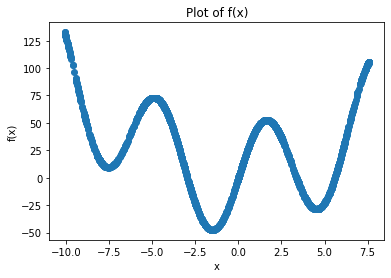

In [5]:
import pandas as pd
cur_x = -10 # The algorithm starts at x=3
rate = 0.1 # Learning rate
precision = 0.001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 1000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 50*np.cos(x) +2*x #Gradient of our function 
c_x = []
fx = []

while previous_step_size > precision and  cur_x <=10:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    c_x.append(cur_x)
    previous_step_size = abs(cur_x - prev_x) #Change in x
    #iters = iters+1 #iteration count
    #print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    t =50*np.sin(cur_x) +cur_x**2
    fx.append(t)
    
#print("The local minimum occurs at", cur_x)

import matplotlib.pyplot as plt
plt.scatter(c_x,fx)
df = pd.DataFrame({'x':c_x,'min':fx})
plt.title('Plot of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
min(fx)
print(df.loc[(df['min'] == min(fx))])


>0 f(1.830488728283477) = 51.67414
>1 f(2.7483073807069944) = 26.71444
>2 f(6.816921145255615) = 71.90807
>3 f(1.1489745995417726) = 46.93737
>4 f(-1.1279361930240466) = -43.90425
>5 f(-3.0449761051949427) = 4.44856
>6 f(2.540700370323675) = 34.72409
>7 f(6.156717623222503) = 31.59863
>8 f(-0.03469397914479977) = -1.73315
>9 f(-5.024746304670385) = 72.82867
>10 f(-5.556310772811208) = 64.09946
>11 f(-8.181323805489718) = 19.58905
>12 f(-4.937421701696747) = 73.11747
>13 f(-5.065628654129752) = 72.57344
>14 f(-5.782199242347232) = 57.44836
>15 f(-9.011306347159977) = 61.11410
>16 f(-2.630387670640368) = -17.54249
>17 f(2.2564680081072046) = 43.79134
>18 f(4.971139564296072) = -23.62329
>19 f(2.6975470096209793) = 28.75657
>20 f(6.673142929502798) = 63.53830
>21 f(0.7138884909593575) = 33.24852
>22 f(-3.207996703765279) = 13.60901
>23 f(2.4225829424580643) = 38.80090
>24 f(5.700358062453104) = 4.97475
>25 f(0.3857368942500363) = 18.96089
>26 f(-4.324017653089786) = 64.97348
>27 f(-1.5658

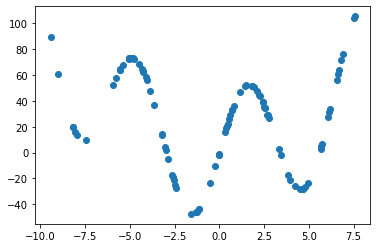

In [114]:
from numpy import asarray
from numpy.random import rand
 
# objective function
def objective(x):
	return  50*np.sin(x) +x**2.0
 
# derivative of objective function
def derivative(x):
	return 50*np.cos(x) +x * 2.0
 
    
    
s,e =[],[]
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# generate an initial point
	solution = 7
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		s.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution)
		e.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval]
 
# define range for input
bounds = asarray([[1.0, 10.0]])
# define the total iterations
n_iter = 100
# define the step size
step_size = 0.1
# perform the gradient descent search
best, score = gradient_descent(objective, derivative, bounds, n_iter, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))
plt.scatter(s,e)